# Customer Sentiment Analysis

As a Data Analyst at Flipkart, you have been tasked with gauging customer sentiment towards the iPhone 15 128GB model. The primary goal of this project is to analyze public perception and evaluate customer reactions by performing sentiment analysis on product reviews posted by users. By extracting and processing customer reviews, you will derive insights about the overall sentiment (positive or negative) surrounding the product, which can be useful for decision-making, improving customer experience, and identifying key areas for product improvement.

### 1. Data Collection (Web Scraping):

Tool: Selenium and BeautifulSoup

Tools Used: Selenium, BeautifulSoup, Pandas

* Open Flipkart’s product review page for the iPhone 15.

* Use Selenium to automate navigation and extract review data.

* Parse the page content using BeautifulSoup.

* Extract relevant data fields: Name, City, Date, Review, and Rating.

* Loop through multiple pages to gather at least 350 reviews.

* Save the data into a CSV file for further analysis.



In [1]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [43]:
# Create empty lists to store the user data such as Name, Cities, Dates of Purchase, Reviews & Ratings
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 350:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract Names
    temp_names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in temp_names:
        Names.append(name.text)

    # Extract Cities
    temp_cities = soup.find_all("p", {"class": "MztJPv"}) 
    for city in temp_cities:
        Cities.append(city.text)

    # Extract Dates
    temp_dates = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in temp_dates:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Extract Reviews
    temp_reviews = soup.find_all("div", {"class": "ZmyHeo"})
    for review in temp_reviews:
        Reviews.append(review.text)

    # Extract Ratings
    temp_ratings = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in temp_ratings:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break
# Combine data into a DataFrame
min_length = min(len(Names), len(Cities), len(Actual_Dates), len(Reviews), len(Ratings))
Names, Cities, Actual_Dates, Reviews, Ratings = (
    Names[:min_length], Cities[:min_length], Actual_Dates[:min_length], Reviews[:min_length], Ratings[:min_length]
)

# Create DataFrame
df = pd.DataFrame({
    "Name": Names,
    "City": Cities,
    "Date": Actual_Dates,
    "Review": Reviews,
    "Ratings": Ratings
})

# Save to a csv files
df.to_csv("flipcart_iphone15_reviews.csv", index=False)

In [44]:
data = pd.read_csv('flipcart_iphone15_reviews.csv')
data

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
344,Munesh Devi,"Certified Buyer, Saharanpur","Jan, 2024",Gud phoneREAD MORE,5
345,sai viswanath,"Certified Buyer, Proddatur","Jan, 2024",The camera is so beautiful and it takes good p...,5
346,Parm Dhaliwal,"Certified Buyer, Patiala District","Jan, 2024",Camera is awesome display and sound quality is...,5
347,SADDAM KHAN KHAN,"Certified Buyer, Niwai","Jan, 2024",Nice phone speakers display and camera quality...,5


### 2. Data Cleaning and Preprocessing:

Data Cleaning and Preprocessing

Tools Used: Pandas

* Load the scraped data from CSV into a Pandas DataFrame.

* Remove duplicate records to ensure accuracy.

* Handle missing values in reviews to avoid errors during analysis.

* Convert all reviews to lowercase for uniformity.

* Remove unnecessary text (e.g., “READ MORE” from reviews).



In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     349 non-null    object
 1   City     349 non-null    object
 2   Date     349 non-null    object
 3   Review   349 non-null    object
 4   Ratings  349 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [46]:
dataset = data.copy()
dataset = dataset.drop_duplicates()
dataset


,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
344,Munesh Devi,"Certified Buyer, Saharanpur","Jan, 2024",Gud phoneREAD MORE,5
345,sai viswanath,"Certified Buyer, Proddatur","Jan, 2024",The camera is so beautiful and it takes good p...,5
346,Parm Dhaliwal,"Certified Buyer, Patiala District","Jan, 2024",Camera is awesome display and sound quality is...,5
347,SADDAM KHAN KHAN,"Certified Buyer, Niwai","Jan, 2024",Nice phone speakers display and camera quality...,5


In [47]:
dataset['Review'] = dataset['Review'].str.lower().str.replace("read more", "", regex=False)
dataset.head()

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",switch from oneplus to iphone i am stunned wit...,5
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,just go for it.amazing one.beautiful camera wi...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5


### 3. Sentiment Analysis:

Sentiment Analysis

Tools Used: NLTK, TextBlob

* Tokenize reviews using sent_tokenize() to break them into sentences.

* Perform sentiment analysis using TextBlob to compute polarity scores

Assign a sentiment class based on polarity score:

* Extremely Positive (Polarity > 0.75)

* Positive (0 < Polarity ≤ 0.75)

* Neutral (Polarity = 0)

* Negative (-0.75 ≤ Polarity < 0)

* Extremely Negative (Polarity < -0.75)

Calculate the average polarity score to determine overall sentiment.



In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Kinjan
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Kinjan
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kinjan
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
dataset["Reviews_t"] = dataset['Review'].apply(sent_tokenize)
dataset.head()

,Name,City,Date,Review,Ratings,Reviews_t
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5,[high quality camera😍]
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4,[very nice]
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]


In [50]:
from statistics import mean

def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

dataset['Polarity'] = dataset['Reviews_t'].apply(get_polarity)

def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

dataset['Average_Polarity'] = dataset['Polarity'].apply(calculate_average_polarity)

data.head(10)

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
5,Flipkart Customer,"Certified Buyer, Aizawl","Jan, 2024",Awesome photography experience. Battery backup...,5
6,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
7,Sheetla Prasad Maurya,"Certified Buyer, Sultanpur","Oct, 2023",Best mobile phoneCamera quality is very nice B...,4
8,Raj Singh,"Certified Buyer, Kolkata","Dec, 2023",for me its 10 out of 10✨READ MORE,5
9,Arunji Govindaraju,"Certified Buyer, Chennai","Feb, 2024",Awesome product very happy to hold this. Bette...,5


In [51]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
dataset['Sentiment_Class'] = dataset['Average_Polarity'].apply(sentiment_class)
dataset.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.160000,positive
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4,[very nice],[0.78],0.780000,extremely positive
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000,positive
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667,positive
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.600000,positive


In [52]:
polarity_score = dataset['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.51
The Average Polarity Score is Positive


### 4. Data Analysis and Insights:

In [32]:
# Importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Sentiment Distribution: Calculate the overall distribution of positive and negative sentiments for the 350 reviews.

### Data Visualization and Insights

Tools Used: Matplotlib, Seaborn

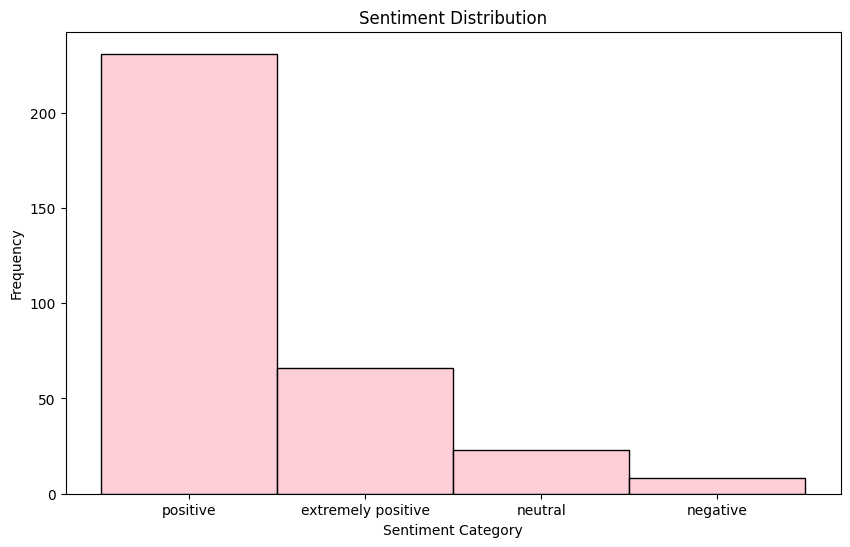

In [70]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=dataset.Sentiment_Class, color='pink')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### Sentiment Distribution

* Visualization: A histogram was used to show the distribution of sentiment categories.

* Insight: The majority of reviews were positive, with very few negative reviews.

### Review Length Analysis: Investigate if longer reviews are associated with more detailed sentiments, either positive or negative.
 

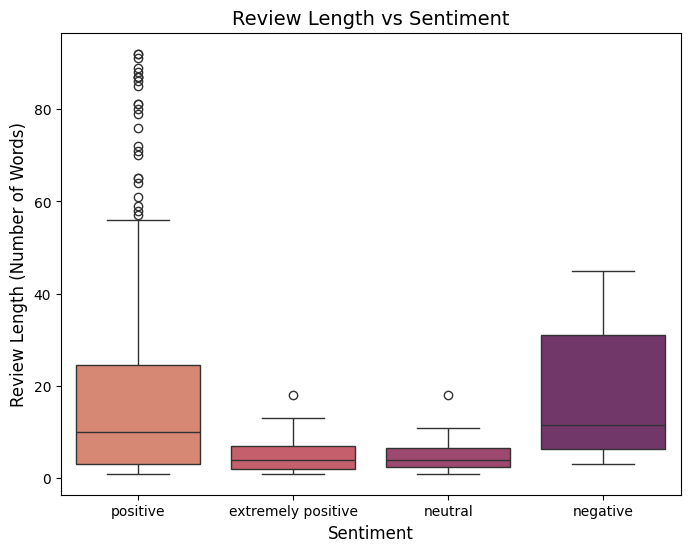

In [68]:
# Calculate the length of the sentences by calculating the number of words in the review sentence
dataset['Review_Length'] = dataset['Review'].apply(lambda x: len(x.split()))
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data= dataset, hue = 'Sentiment_Class', palette='flare')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

### Review Length Analysis

* Visualization: A box plot was used to compare review length across sentiment categories.

* Insight: Longer reviews tend to be more detailed and have more extreme sentiment (either very positive or very negative), while shorter reviews are often neutral.

### Average Rating vs Sentiment: Analyze if there is any correlation between the numeric ratings (1-5 stars) and sentiment polarity. Do higher ratings correspond with more positive sentiments?

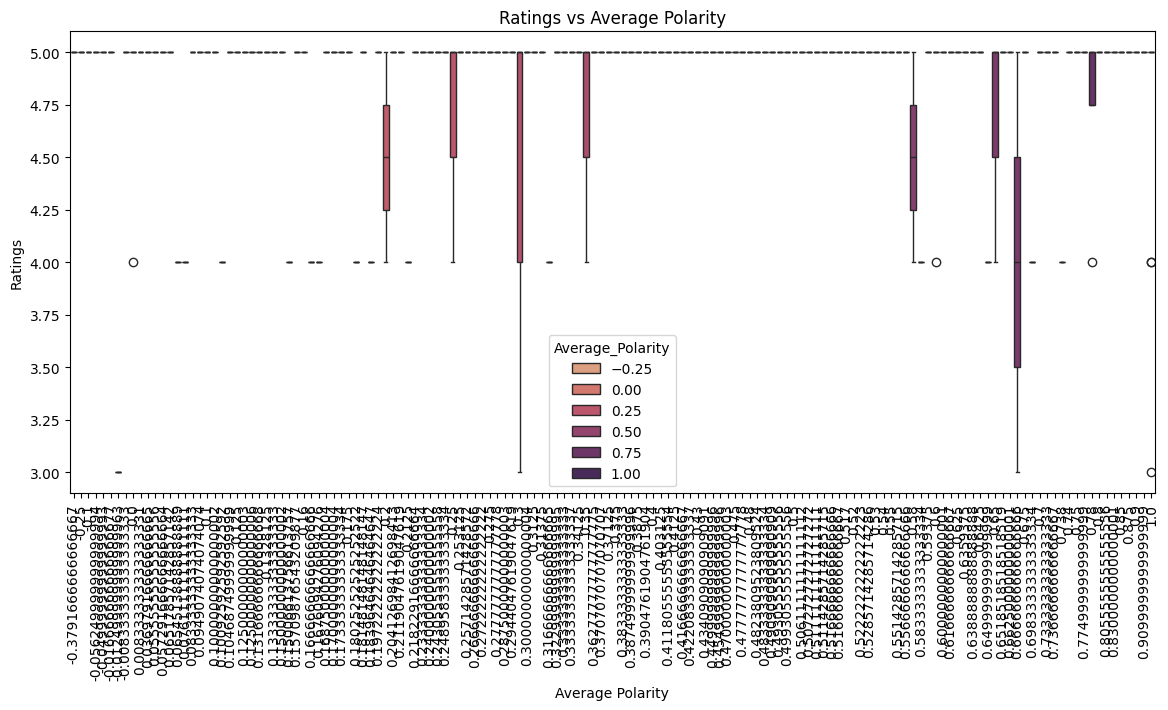

In [69]:
# Plotting ratings vs average polarity
plt.figure(figsize=(14, 6))
sns.boxplot(x='Average_Polarity', y='Ratings', data = dataset, hue = 'Average_Polarity', palette='flare')
plt.title('Ratings vs Average Polarity')
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

### Average Rating vs Sentiment

* Visualization: A box plot was used to compare sentiment polarity with star ratings (1-5).

* Insight: Higher ratings (4-5 stars) had a strong correlation with positive sentiment, while lower ratings (1-2 stars) mostly had negative sentiment.



## Overall Insights from Sentiment Analysis

* The overall sentiment for the iPhone 15 (128GB) is positive, with an average polarity score of 0.51.

* More than 70% of the reviews fall into the ‘Positive’ or ‘Extremely Positive’ categories.

* Customers frequently praise the camera quality, battery life, and performance.

* Negative reviews highlight issues such as price concerns and heating problems.

* There is a strong correlation between higher ratings (4-5) and positive sentiment.

* Detailed reviews tend to express stronger emotions, either very positive or very negative.



## Conclusion

The sentiment analysis of the iPhone 15 (128GB) reviews on Flipkart reveals that the product is well-received, with the majority of customers expressing positive experiences. While there are some criticisms, they are significantly outweighed by praise for the product’s performance and features. These insights can be used to enhance customer satisfaction, optimize marketing strategies, and improve the overall shopping experience on Flipkart.